In [1]:
# # colab설정

# from google.colab import drive
# import os 
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sen
# import numpy as np
# %matplotlib inline

# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/black_swan_physionet/'
# os.chdir(path)

# file = 'train_done_preprocessing.csv'
# file2 = 'valid_done_preprocessing.csv'
# file3 = 'test_done_preprocessing.csv'

# train_df = pd.read_csv(path+file)
# valid_df = pd.read_csv(path+file2)
# test_df = pd.read_csv(path+file3)

# maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])

# print(len(test_df))
# test_df.head()

In [2]:
# Jupyter Notebook 설정

import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sen
%matplotlib inline
import numpy as np

path = '/Users/jsha/gjai/final_project/black_swan_physionet/'

file = 'train_done_preprocessing.csv'
file2 = 'valid_done_preprocessing.csv'
file3 = 'test_done_preprocessing.csv'

train_df = pd.read_csv(path+file)
valid_df = pd.read_csv(path+file2)
test_df = pd.read_csv(path+file3)

maxlen = len(train_df[train_df['pid'] == train_df['pid'][0]])

print(len(test_df))
test_df.head()

28000


,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,MBP,male,female,surv_los,LOS,labels,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0
0,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-7.0,6.0,0.0,0,0,1,0
1,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-7.0,6.0,0.0,0,0,1,0
2,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-7.0,6.0,0.0,0,0,1,0
3,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-7.0,6.0,0.0,0,0,1,0
4,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-7.0,6.0,0.0,0,0,1,0


In [3]:
# labels 컬럼 인덱스 찾기
inx = test_df.columns.get_indexer(['labels'])
print(inx)

# X, y 분리
y_test = test_df['labels']
X_test_nonorm = test_df.drop(columns=['pid', 'Gender', 'survival', 'surv_los', 'LOS', 'labels'])
print(y_test.shape)
print(X_test_nonorm.shape)

# minmaxscaler 적용
import pickle

mms = 'mms.pickle'
with open(path+mms, 'rb') as handler:
    load_mms = pickle.load(handler)
    
X_test = load_mms.transform(X_test_nonorm)

X_test_3d = X_test.reshape((-1, maxlen, X_test.shape[-1]))
print(X_test_3d.shape)
y_test_3d = y_test[::maxlen]
print(y_test_3d.shape)

[41]
(28000,)
(28000, 40)
(400, 70, 40)
(400,)


In [4]:
!pwd

/Users/jsha/gjai/final_project/black_swan_physionet


In [5]:
# 학습된 Best models 가져오기
import os
from tensorflow.keras.models import load_model
import lightgbm as lgb

file_list = os.listdir()
deep_model_list = [file for file in file_list if file.endswith('_upto.h5')]
machine_model_list = [file for file in file_list if file.endswith('_machine.h5')]
print(deep_model_list)
print(machine_model_list)

# 모델별 X_test predict하고, test_df에 column 저장하기
for name in machine_model_list:
    loaded_model = lgb.Booster(model_file=name)
    test_pred = loaded_model.predict(X_test)

for name in deep_model_list:
    loaded_model = load_model(path+name)
    test_pred = loaded_model.predict(X_test_3d)
    
    for i, pid in enumerate(list(test_df.pid.unique())):
        test_df.loc[test_df.query('pid==@pid').index, f'{name}_pred'] = test_pred[i][0]
        

['simple_model_best_upto.h5', 'api_model_best_upto.h5', 'cnn_model_best_upto.h5', 'lstm_model_best_upto.h5', 'bidirec_model_best_upto.h5']
[]


2022-12-05 00:47:04.617180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


13/13 [==============================] - 1s 14ms/step


In [5]:
test_df.head()

,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,labels,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0,api_model_best_upto.h5_pred,bidirec_model_best_upto.h5_pred,cnn_model_best_upto.h5_pred,lstm_model_best_upto.h5_pred,simple_model_best_upto.h5_pred
0,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371
1,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371
2,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371
3,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371
4,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371


Text(0, 0.5, 'True Positive Rate(Positive label: 1)')

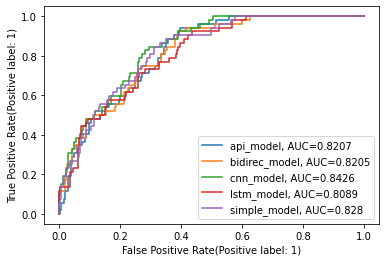

In [6]:
# 모델 간 roc_curve 비교하기

%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

auc_score_dict = {}
model_pred_list = [col for col in test_df.columns.to_list() if col.endswith('pred')]
rename_list = []
for name in model_pred_list:
    fpr, tpr, _ = roc_curve(y_test, test_df[name])
    auc = round(roc_auc_score(y_test, test_df[name]), 4)
    name2 = '_'.join(name.split('_')[:2])
    rename_list.append(name2)
    auc_score_dict[name2] = auc
    plt.plot(fpr, tpr, label=f"{name2}, AUC="+str(auc))
    
plt.legend()
plt.xlabel('False Positive Rate(Positive label: 1)')
plt.ylabel('True Positive Rate(Positive label: 1)')


In [7]:
# 모든 모델 pred 평균값으로 auroc score 구하기

test_df['models_mean_pred'] = test_df[model_pred_list].mean(axis=1)
auc_mean = round(roc_auc_score(y_test, test_df.models_mean_pred), 4)

auc_score_dict['mean_all_models'] = auc_mean

print(f'auroc_score of mean of all models: {auc_mean}')


auroc_score of mean of all models: 0.8317


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

test_df.head()

,pid,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,...,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0,api_model_best_upto.h5_pred,bidirec_model_best_upto.h5_pred,cnn_model_best_upto.h5_pred,lstm_model_best_upto.h5_pred,simple_model_best_upto.h5_pred,models_mean_pred
0,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371,0.277179
1,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371,0.277179
2,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371,0.277179
3,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371,0.277179
4,135089.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0.28191,0.242593,0.308481,0.30954,0.243371,0.277179


In [9]:
test_df2 = test_df.copy()

dummy_dict = dict((name, name2+'_pred') for name, name2 in zip(model_pred_list, rename_list))
dummy_dict
test_df2.rename(columns=dummy_dict, inplace=True)
test_df2.columns



Index(['pid', 'age', 'Gender', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN',
       'Bilirubin', 'Cholesterol', 'Creatinine', 'FiO2', 'GCS', 'Glucose',
       'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'Na', 'PaCO2', 'PaO2',
       'Platelets', 'RR', 'SPO2', 'BT', 'TroponinI', 'TroponinT', 'Urine',
       'WBC', 'pH', 'MechVent', 'survival', 'SBP', 'DBP', 'MBP', 'male',
       'female', 'surv_los', 'LOS', 'labels', 'ICUType_1.0', 'ICUType_2.0',
       'ICUType_3.0', 'ICUType_4.0', 'api_model_pred', 'bidirec_model_pred',
       'cnn_model_pred', 'lstm_model_pred', 'simple_model_pred',
       'models_mean_pred'],
      dtype='object')

['api_model_pred', 'bidirec_model_pred', 'cnn_model_pred', 'lstm_model_pred', 'simple_model_pred', 'models_mean_pred']
auc: 0.8425618921308576
[0.         0.01923077 0.09615385 0.09328028 0.13174182 0.12886826
 0.14809903 0.1423519  0.18081344 0.16931919 0.18854996 0.18567639
 0.20490716 0.2020336  0.27895668 0.26746242 0.28669319 0.2780725
 0.31653404 0.31078691 0.33001768 0.3127763  0.33200707 0.32913351
 0.34836428 0.34549072 0.36472149 0.3561008  0.37533156 0.372458
 0.39168877 0.3658267  0.38505747 0.38218391 0.40141468 0.37842617
 0.39765694 0.38328912 0.40251989 0.38815208 0.42661362 0.39500442
 0.43346596 0.4305924  0.44982317 0.44407604 0.46330681 0.44319187
 0.46242263 0.45954907 0.47877984 0.45291777 0.51061008 0.50773652
 0.52696729 0.5183466  0.53757737 0.52608311 0.54531388 0.53094607
 0.55017683 0.50994695 0.52917772 0.51193634 0.53116711 0.49381079
 0.53227233 0.48916888 0.50839965 0.47966401 0.49889478 0.47015915
 0.48938992 0.4750221  0.49425287 0.        ]


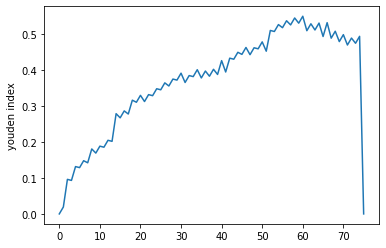

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

pred_list = [pred for pred in test_df2.columns if pred.endswith('_pred')]
print(pred_list)

fpr, tpr, thr = roc_curve(y_test, test_df2.cnn_model_pred)
print(f'auc: {auc(fpr, tpr)}')

youden_idx = tpr + 1 - fpr - 1

plt.plot(range(len(thr)), youden_idx)
plt.ylabel('youden index')
print(youden_idx)

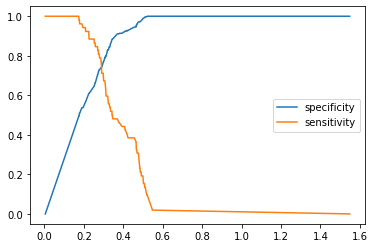

In [11]:
plt.plot(thr, 1-fpr, label='specificity')
plt.plot(thr, tpr, label='sensitivity')
plt.legend()


## cutoff - argmax(youden_idx)

In [12]:
cutoff = thr[np.argmax(youden_idx)]
cutoff = round(cutoff, 2)
cutoff


0.27

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
fp_df = test_df2.query('cnn_model_pred>@cutoff and labels==0')

fp_df.groupby(by='pid').median()

,age,Gender,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,...,ICUType_1.0,ICUType_2.0,ICUType_3.0,ICUType_4.0,api_model_pred,bidirec_model_pred,cnn_model_pred,lstm_model_pred,simple_model_pred,models_mean_pred
pid,,,,,,,,,,,,,,,,,,,,,
132570.0,84.0,1.0,19.0,15.0,20.0,2.9,83.0,0.1,143.5,3.50,...,1.0,0.0,0.0,0.0,0.325288,0.304598,0.327413,0.340888,0.207096,0.301057
132582.0,84.0,1.0,85.0,45.0,72.0,2.6,29.0,0.8,143.5,1.10,...,0.0,0.0,1.0,0.0,0.276624,0.216460,0.300088,0.266338,0.252363,0.262374
132610.0,72.0,1.0,85.0,45.0,72.0,2.9,20.0,0.8,143.5,1.00,...,0.0,0.0,1.0,0.0,0.281222,0.233951,0.324679,0.300477,0.283548,0.284775
132772.0,68.0,1.0,53.0,27.0,41.0,2.9,45.0,0.4,143.5,1.60,...,0.0,0.0,1.0,0.0,0.308440,0.206065,0.341309,0.319240,0.411658,0.317342
132946.0,29.0,1.0,85.0,45.0,72.0,2.9,6.0,0.8,143.5,0.80,...,0.0,0.0,0.0,1.0,0.196109,0.171116,0.317690,0.249760,0.218421,0.230619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142400.0,68.0,0.0,89.0,39.0,101.0,3.6,9.0,1.7,143.5,0.65,...,0.0,0.0,0.0,1.0,0.202396,0.277268,0.434308,0.410893,0.303593,0.325691
142405.0,50.0,1.0,85.0,45.0,72.0,2.9,38.0,0.8,143.5,4.80,...,1.0,0.0,0.0,0.0,0.249433,0.190394,0.273704,0.255201,0.172170,0.228181
142527.0,76.0,1.0,43.0,15.0,29.0,3.3,72.0,0.3,143.5,1.10,...,0.0,0.0,1.0,0.0,0.339834,0.212583,0.368186,0.223227,0.181047,0.264976


In [14]:
test_df2.columns

Index(['pid', 'age', 'Gender', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN',
       'Bilirubin', 'Cholesterol', 'Creatinine', 'FiO2', 'GCS', 'Glucose',
       'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'Na', 'PaCO2', 'PaO2',
       'Platelets', 'RR', 'SPO2', 'BT', 'TroponinI', 'TroponinT', 'Urine',
       'WBC', 'pH', 'MechVent', 'survival', 'SBP', 'DBP', 'MBP', 'male',
       'female', 'surv_los', 'LOS', 'labels', 'ICUType_1.0', 'ICUType_2.0',
       'ICUType_3.0', 'ICUType_4.0', 'api_model_pred', 'bidirec_model_pred',
       'cnn_model_pred', 'lstm_model_pred', 'simple_model_pred',
       'models_mean_pred'],
      dtype='object')

In [15]:
icu_col = {'ICUType_1.0':1, 'ICUType_2.0':2, 'ICUType_3.0':3, 'ICUType_4.0':4}
test_df2['ICUType'] = np.nan

for icu, val in icu_col.items():
    test_df2['ICUType'][test_df2[icu] == 1] = val

test_df2.ICUType.value_counts()    

<ipython-input-15-dcdb8a0351aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df2['ICUType'][test_df2[icu] == 1] = val


3.0    10780
4.0     7700
2.0     6020
1.0     3500
Name: ICUType, dtype: int64

In [16]:
test_df2.head()
test_df2.to_csv(path+'physionet_test_data_all_model_pred.csv', index=False)

In [17]:
!pwd

/content/drive/Othercomputers/My MacBook Pro/black_swan_physionet


In [18]:
pred_positive_df = test_df2.query('cnn_model_pred>=@cutoff')
pred_negative_df = test_df2.query('cnn_model_pred<@cutoff')

pred_TPR_df = test_df2.query('cnn_model_pred>=@cutoff and labels==1')
pred_FPR_df = test_df2.query('cnn_model_pred>=@cutoff and labels==0')
pred_TNR_df = test_df2.query('cnn_model_pred<@cutoff and labels==0')
pred_FNR_df = test_df2.query('cnn_model_pred<@cutoff and labels==1')


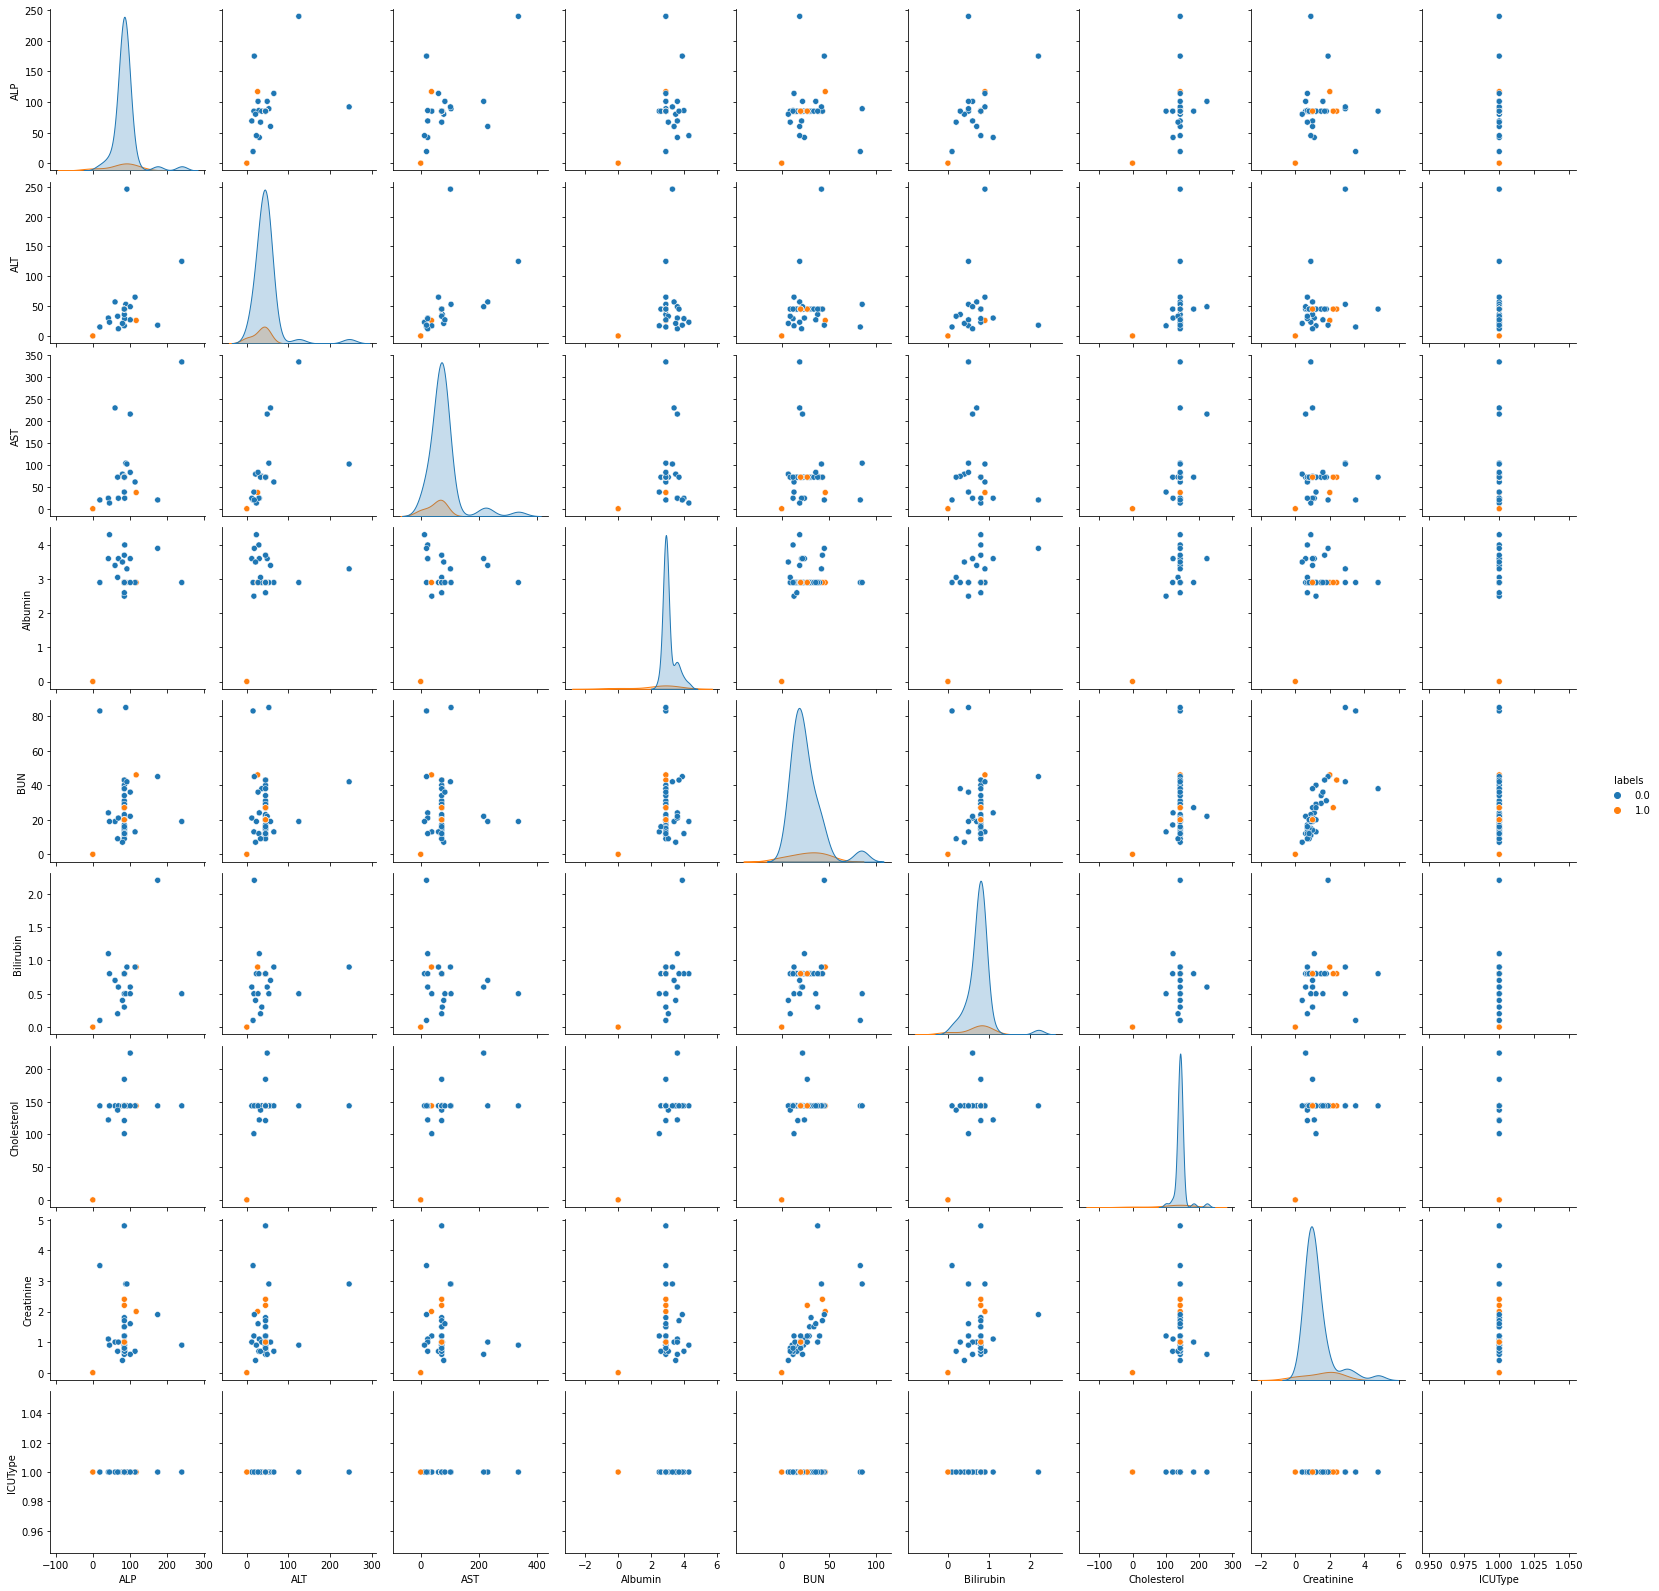

In [38]:
import seaborn as sns

new_df = test_df2[['pid', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'FiO2', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Lactate', 'Mg', 'Na', 'PaCO2', 'PaO2', 'Platelets', 'RR', 'SPO2', 'BT', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'pH', 'MechVent', 'survival', 'SBP', 'DBP', 'MBP', 'Gender', 'surv_los', 'LOS', 'labels', 'ICUType']]
new_df = test_df2[['pid', 'ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Bilirubin', 'Cholesterol', 'Creatinine', 'ICUType', 'labels']]

icu1 = new_df.query('ICUType==1.').groupby(by='pid').median()
icu1

sns.pairplot(icu1, hue='labels')


In [ ]:
print(test_df2.columns.to_list())